In [28]:
import pandas as pd
import plotly.express as px
import math
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [30]:
print("Columnas ")
print(df.dtypes)

Columnas 
customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object


In [31]:
display(df.head())

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Se tienen distintas columnas asociadas a la perdida de clientes bancarios, en este dataset se tienen columnas como país, edad, genero, numero de productos bancarios, tarjetas de credito, si es miembro activo, salario estimado y balance de las cuentas para predecir que tan probable es que decistan

In [32]:
duplicados = df[df['customer_id'].duplicated()]
print("duplicados: " ,len(duplicados))

duplicados:  0


No se encontraron duplicados dentro del ID


In [33]:
df['country'] = df['country'].astype(str).str.strip().str.title()
#conteo por pais
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="country",
    hover_name="country",
    hover_data={"count": True, "country": False}, 
    title="Usuarios de banca por país",
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(marker_line_color="black", marker_line_width=1)

fig.update_geos(
    projection_type="natural earth",
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="#FAF1F1",   
    showocean=True,
    oceancolor="#DCF0FF",
    showframe=False
)
fig.update_geos(fitbounds="locations")
fig.update_layout(
    paper_bgcolor="white",
    plot_bgcolor="white",
    legend_title_text="País"
)
fig.show()

C:\Users\DiDi\AppData\Local\Temp\ipykernel_34052\2831741501.py:6: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Los 3 países de los cuales se tiene data son España (2477 usuarios), Francia(5014 usuarios) y Alemania (2509 usuarios).

Se realizaron histogramas para entender la distribución de las variables númericas y gráficos de barra para entender la frecuencia de las variables categóricas.

C:\Users\DiDi\AppData\Local\Temp\ipykernel_34052\1337692396.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\DiDi\AppData\Local\Temp\ipykernel_34052\1337692396.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



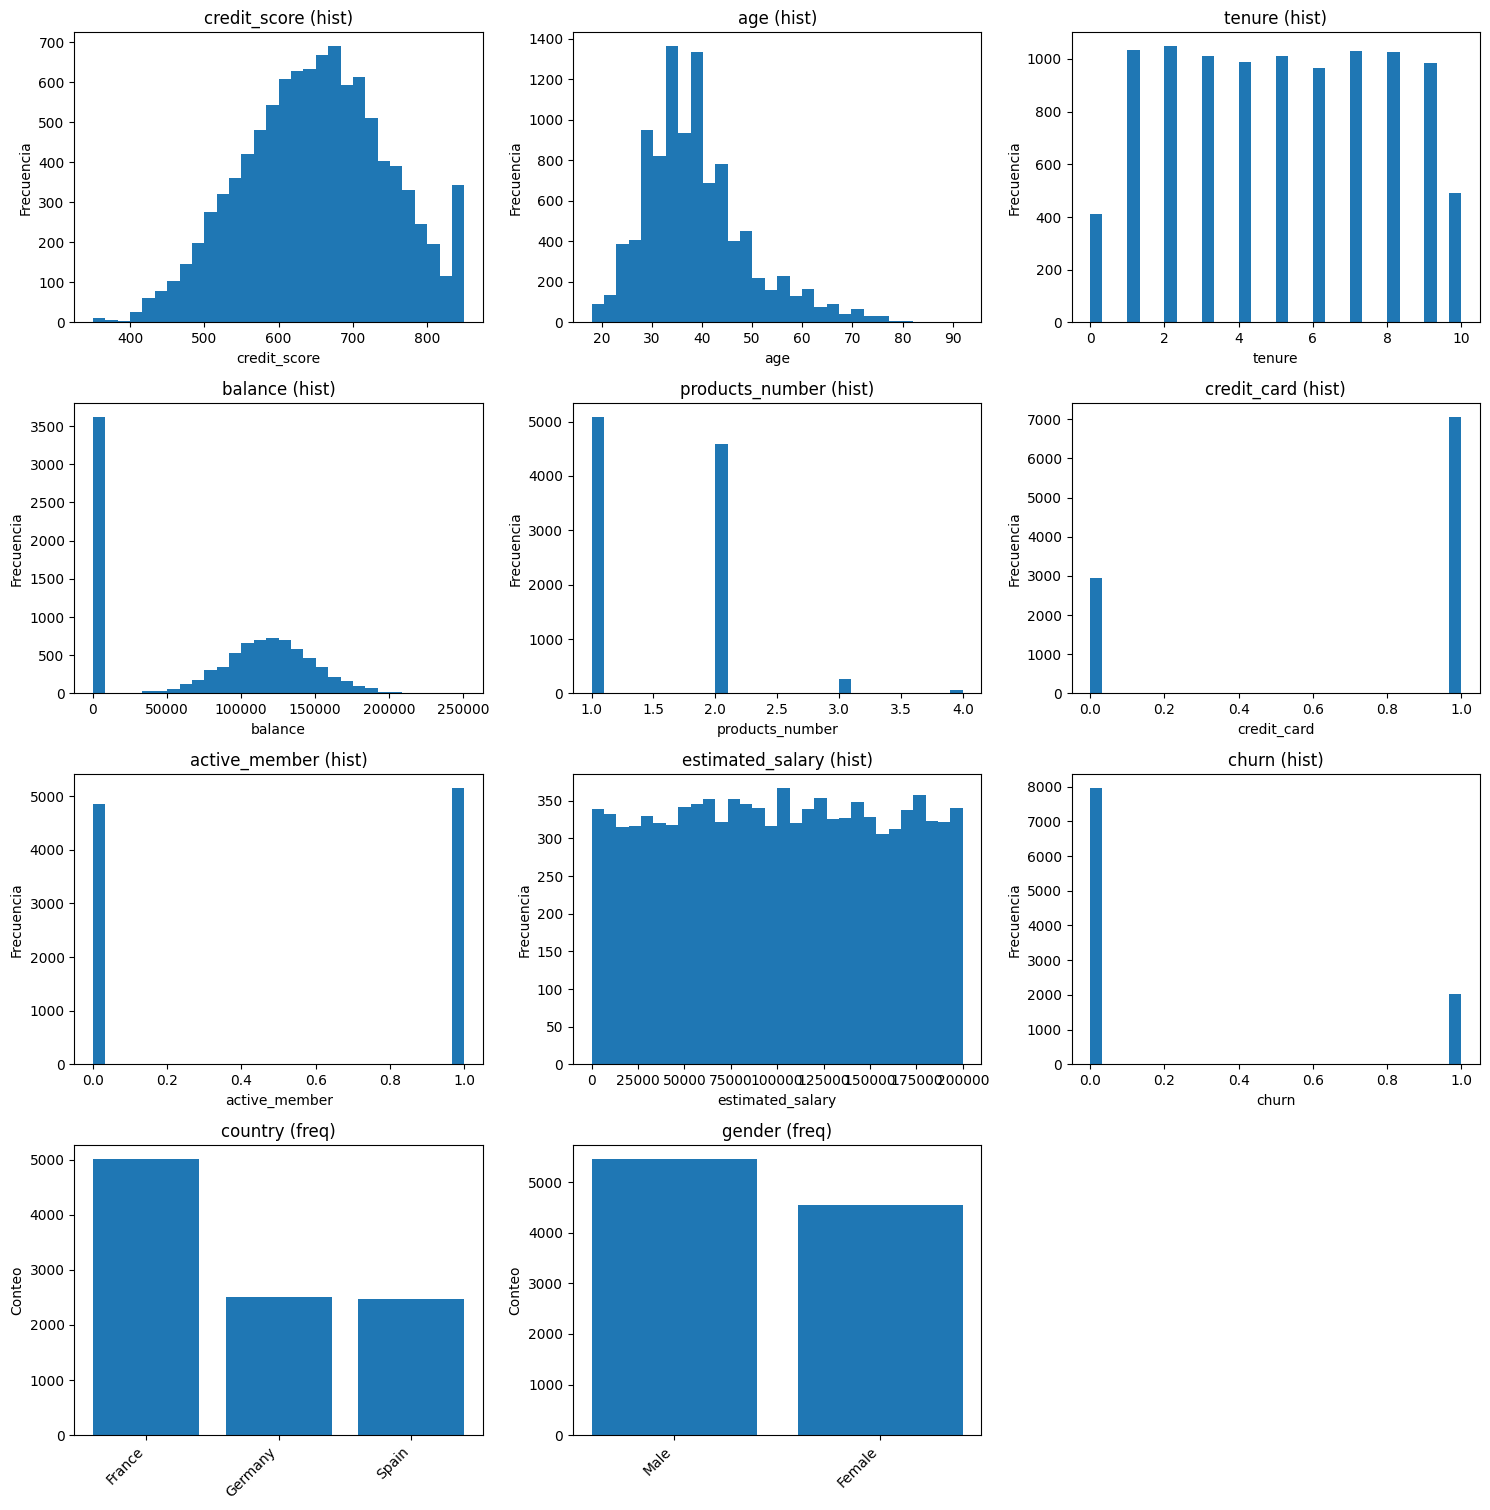

In [ ]:
cols = [c for c in df.columns if not c.lower().endswith("id")]

#Separar columnas por tipo de variables
numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
catbool_cols = [c for c in cols if c not in numeric_cols]

#Función para graficar histogramas en una grilla
def plot_grid_all(df, numeric_cols, catbool_cols, bins=30, max_cat=30):
    all_cols = numeric_cols + catbool_cols
    n = len(all_cols)
    if n == 0:
        print("No hay columnas para graficar.")
        return
    
    #Definir grilla
    ncols = 3
    nrows = math.ceil(n / ncols)
    plt.figure(figsize=(ncols*5, nrows*3.8))

    for i, col in enumerate(all_cols, start=1):
        ax = plt.subplot(nrows, ncols, i)
        s = df[col].dropna()

        if col in numeric_cols:
            #Histograma para numéricas
            ax.hist(s, bins=bins)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")
            ax.set_title(f"{col} (hist)")
        else:
            #Barras para categóricas/booleanas
            vc = s.astype(str).value_counts().sort_values(ascending=False)
            if len(vc) > max_cat:
                vc = vc.head(max_cat)
            ax.bar(vc.index, vc.values)
            ax.set_xticklabels(vc.index, rotation=45, ha='right')
            ax.set_ylabel("Conteo")
            ax.set_title(f"{col} (freq)")
    
    plt.tight_layout()
    plt.show()

plot_grid_all(df, numeric_cols, catbool_cols, bins=30, max_cat=30)

El análisis de las distribuciones muestra que la mayoría de los clientes presenta un puntaje crediticio medio y edades comprendidas entre los 30 y 45 años, lo que refleja una base de usuarios con perfiles financieros estables y activos. Los saldos se concentran en rangos intermedios, mientras que la permanencia en el banco (tenure) se distribuye de forma uniforme, sin predominio de un grupo específico. Además, la mayor parte de los clientes posee uno o dos productos contratados, lo que sugiere un nivel moderado de vinculación.

Se observa también una proporción importante de clientes inactivos, lo que podría estar relacionado con el abandono de la entidad. La variable de salario estimado presenta una distribución que parece ser uniforme, mientras que la variable objetivo (churn) evidencia un marcado desbalance, con una mayoría de clientes que permanecen en el banco (lo que podría generar problemas a la hora de hacer las estimaciones). Estos patrones generales permiten identificar características comunes entre los usuarios y posibles factores asociados al riesgo de abandono, información clave para el modelado predictivo posterior.